# UTS Praktikum Machine Learning
- NIM : 1227050107
- Nama : Onixa Shafa Putri Wibowo
- Kelas : E
- Mata Kuliah : Praktikum ML

1. Import Library dan Dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

2. Load dataset dan lihat data

In [55]:
df = pd.read_csv("dataset_buys _comp.csv")
print(df.head(10))

          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1
5        Muda  Rendah   Tidak         Buruk              1
6  Paruh Baya  Sedang      Ya         Buruk              1
7  Paruh Baya  Sedang   Tidak         Buruk              1
8         Tua  Sedang   Tidak          Baik              1
9        Muda  Tinggi      Ya          Baik              1


3. Menampilkan grafik

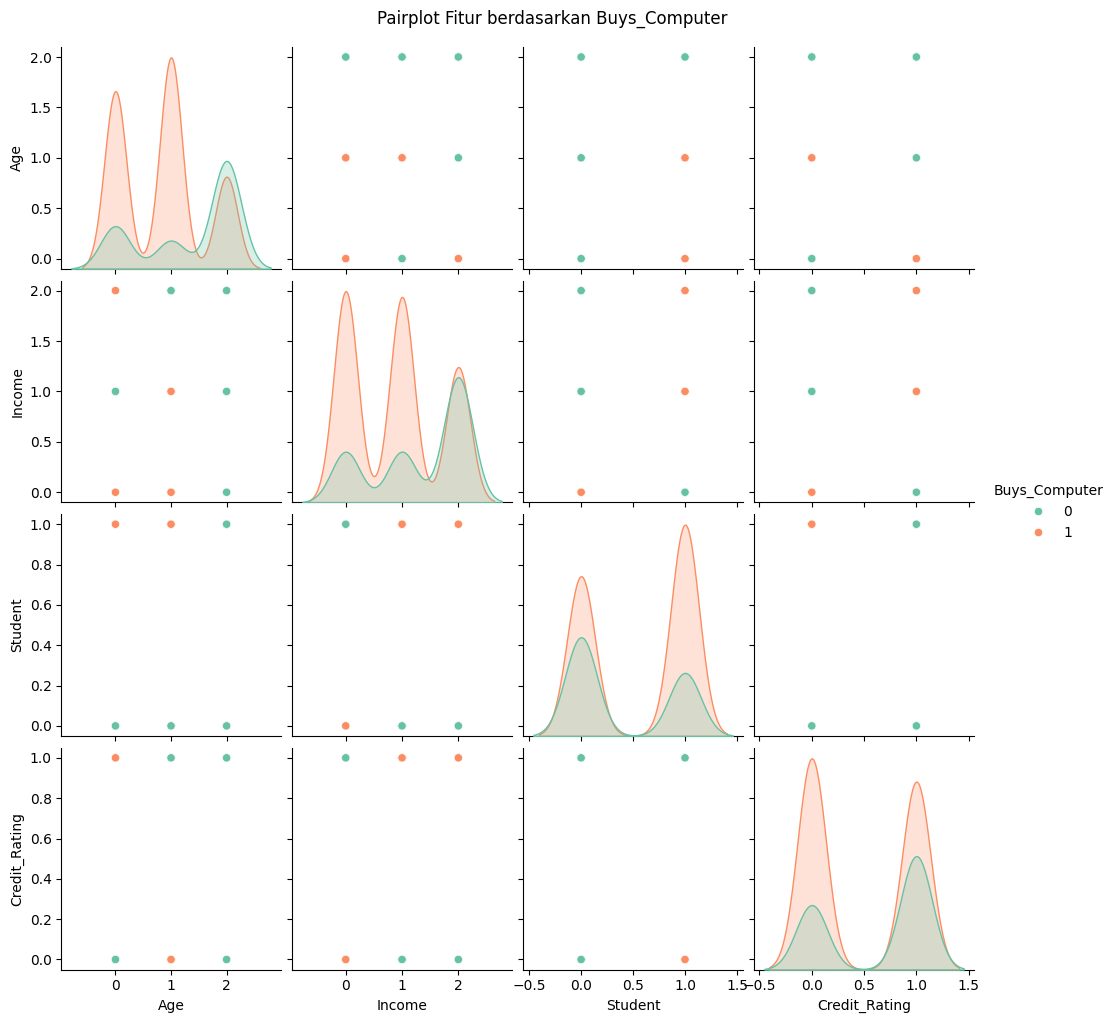

In [56]:
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.pairplot(df_encoded, hue='Buys_Computer', palette='Set2')
plt.suptitle('Pairplot Fitur berdasarkan Buys_Computer', y=1.02)
plt.show()

4. Encoding

In [57]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

5. Memisahkan fitur dan terget

In [58]:
X = df_encoded.drop('Buys_Computer', axis=1)
y = df_encoded['Buys_Computer']

6. Split data training dan testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Membuat model decision tree

In [60]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(X_test)

     Age  Income  Student  Credit_Rating
521    0       2        0              1
737    1       2        0              1
740    1       1        0              0
660    0       2        1              0
411    1       0        0              1
..   ...     ...      ...            ...
408    0       0        1              0
332    1       1        0              1
208    1       0        1              0
613    0       1        1              0
78     0       1        1              1

[200 rows x 4 columns]


8. Evaluasi performa:
- Accuracy
- Confusion matrix
- Classification report

- Accuracy

In [61]:
#%%
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.805


- Classification report

In [62]:
#%%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



- Confusion Matrix

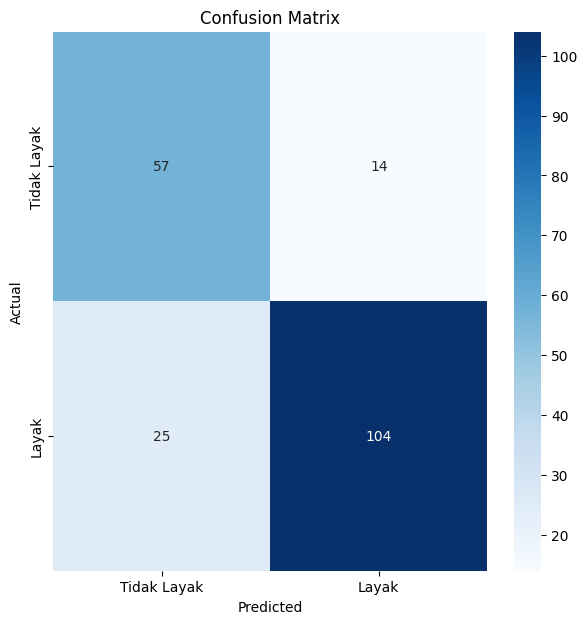

In [63]:
#%%
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Layak', 'Layak'], 
            yticklabels=['Tidak Layak', 'Layak'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

9. Visualisasi Decision Tree

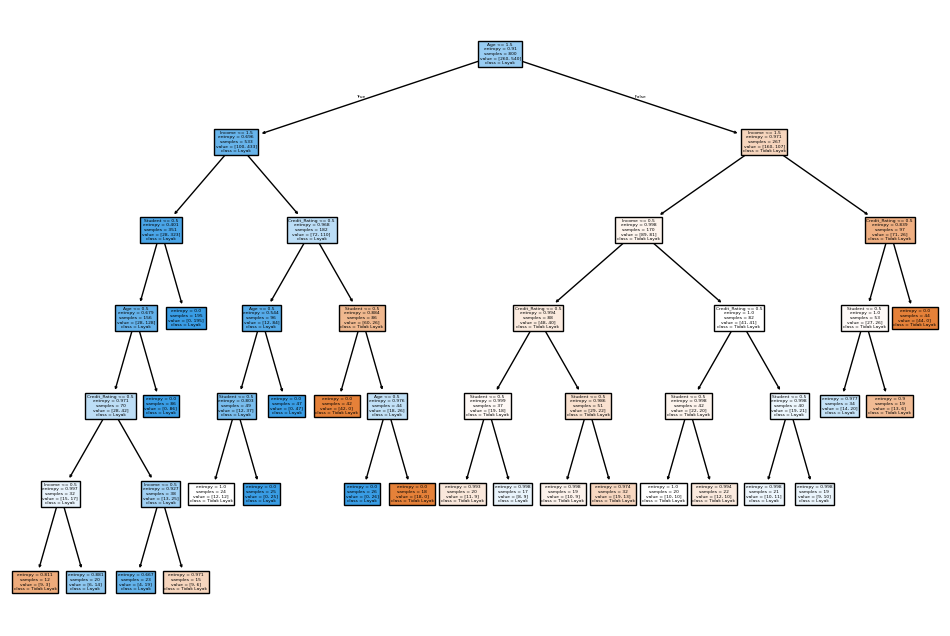

In [64]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=['Tidak Layak', 'Layak']
)
plt.show()